# Sympy - A first glance

Sympy is a Python library that primarily deals with **symbolic mathematics**.  By this we mean formal algebraic expressions, such as:

 * Polynomials $x^3+3x-2$
 * Abstract functional expressions $\sin(x), e^x, \frac{\sin x}{\tan^2 x + 3x^2 + 1}$, etc.
 * Operations on these expressions, such as: 
   - Root finding, in **closed form** when it is possible.
   - Differentiation, integration.
   - Solving systems of non-linear equations in "closed form" i.e. going from expressions like $x^2=2$ to $x = \pm \sqrt{2}$. 
   - Finding **closed form** solutions to differential equations, when they exist, such as going from $y'=y$ to $y(t) = ke^t$. 
   
Sympy is capable of much more than the above, but these are some of its most basic features.

## Before we begin -- numbers and data types in Python

Simple things like numbers have multiple representations in Python.  

For example, in your second quiz you wrote an algorithm that divides an integer by 2.  Let's look at various ways Python can deal with this.

In [2]:
print(3/2)
print(type(3/2))

1.5
<class 'float'>


### 3/2 in Python

In Python, the **division** operation is implemented in a way that closely mimics how we use it in practice.  But there are also compromises to ensure it isn't an *expensive* computation to do in large quantities.

Given two integers $m$ and $n$, Python implements $m/n$ as a **float**. **float** (short for floating-point) data types are an imprecise data type and this can lead to problems.  We will talk more about this later.   

What if you want **integer division**?  By this I am referring to the <a href="https://en.wikipedia.org/wiki/Division_algorithm">**division algorithm**</a>. This states that given any integer $n$, and any positive integer $d$ (the **denominator**), there are unique integers $q$ (the **quotient**) and $r$ the **remainder** so that

$$ n = q\cdot d + r \ \ \ 0 \leq r < d. $$

Another way to say this is

$$ \frac{n}{d} = q + \frac{r}{d}$$

i.e. the division algorithm is a procedure to write an arbitrary fraction as a **reduced fraction**, where this means $0 \leq \frac{r}{d} < 1$.

For example $n=3, d = 2$

$$ 3 = 1 \cdot 2 + 1 $$

For $n=13, d = 3$

$$ 13 = 4 \cdot 3 + 1 $$

The Python operations for the division algorithm are $//$ and $\%$.


In [3]:
print("n=3, d=2  q=",3//2, " r=",3%2)

n=3, d=2  q= 1  r= 1


In [8]:
for n in range(-2, 7):
    print("n =",n, "d = 2  q =",n//2, " r =",n%2, " ", n==(n//2)*2+(n%2))

n = -2 d = 2  q = -1  r = 0   True
n = -1 d = 2  q = -1  r = 1   True
n = 0 d = 2  q = 0  r = 0   True
n = 1 d = 2  q = 0  r = 1   True
n = 2 d = 2  q = 1  r = 0   True
n = 3 d = 2  q = 1  r = 1   True
n = 4 d = 2  q = 2  r = 0   True
n = 5 d = 2  q = 2  r = 1   True
n = 6 d = 2  q = 3  r = 0   True


### isinstance and type

Often times the simplest way to figure out how Python interprets your expression is via the **type** and **isinstance** commands. 

The **type** gives you the name of the underlying Python data type of an object.

In [14]:
print(type(1))
print(type(1.0))
print(type(1/2))
print(type(1//2))

<class 'int'>
<class 'float'>
<class 'float'>
<class 'int'>


**isinstance** allows you to check if an object is of a specific type. This is a useful command to protect a function against mis-use.

In [15]:
print(isinstance(1, int))
print(isinstance(1.0, int))

True
False


## Changing gears -- basic Sympy examples

In [9]:
import sympy as sp
x = sp.Symbol('x')

print(x)
print(x**2)
sp.pprint(x**2)

x
x**2
 2
x 


In [20]:
## Sympy expressions are not functions

f = x**3 + sp.sin(x)
sp.pprint(f)
print(f(1))



 3         
x  + sin(x)


TypeError: 'Add' object is not callable

## Sympy types

Sympy types at first appear a little confusing.  We will discuss how to interpret them next week.  Even *the same* mathematical object can have different sympy types!

In [67]:
print(type(x))
print(type(sp.sin(x)*x))
print(type(x**2 + 2*x + 1),  type((x+1)**2))

<class 'sympy.core.symbol.Symbol'>
<class 'sympy.core.mul.Mul'>
<class 'sympy.core.add.Add'> <class 'sympy.core.power.Pow'>


Similarly, Sympy's notion of equality is perhaps not what one might expect.  We will also discuss this in more detail next week.

In [24]:
print(x**2 + 2*x + 1 == (x+1)**2)
print(x**2 + 2*x + 1 == 1 + 2*x + x**2)

False
True


In [27]:
print(sp.sqrt(2)/2 == 1/sp.sqrt(2))
sp.pprint(sp.sqrt(2)/2)
sp.pprint(1/sp.sqrt(2))
print(1/(1+sp.sqrt(2)) == (sp.sqrt(2)-1))
sp.pprint(1/(1+sp.sqrt(2)))
sp.pprint(sp.sqrt(2)-1)

True
√2
──
2 
√2
──
2 
False
  1   
──────
1 + √2
-1 + √2


Sympy algebraic expressions like $\sin(x)+x^2$ are not callable functions, so one might imagine **what is the point of using Sympy** if you can't use algebraic expressions for their purpose?

Sympy allows us to convert their Sympy algebraic expressions into callable functions, with the lambdify command.

In [17]:
f = sp.sin(x**2)+x

F = sp.lambdify(x, f)

In [18]:
F(1)

1.8414709848078965

### Advantage of Sympy algebraic expressions

Sympy allows for many basic operations on algebraic expressions, like differentiation and integration.

In [19]:
## differentiation

fp = sp.diff(f, x)
sp.pprint(fp)

       ⎛ 2⎞    
2⋅x⋅cos⎝x ⎠ + 1


In [20]:
## integration

f = x**3 + sp.cos(x)
sp.pprint(f)

F = sp.integrate(f, x)
sp.pprint(F)

 3         
x  + cos(x)
 4         
x          
── + sin(x)
4          


What would Sympy do if we ask it to integrate $f = \sin(x^2) $?

In [21]:
f = sp.sin(x**2)
F = sp.integrate(f,x)
sp.pprint(f)
sp.pprint(F)

   ⎛ 2⎞
sin⎝x ⎠
                ⎛√2⋅x⎞       
3⋅√2⋅√π⋅fresnels⎜────⎟⋅Γ(3/4)
                ⎝ √π ⎠       
─────────────────────────────
           8⋅Γ(7/4)          


Let's find out what "fresnels" is.

In [ ]:
sp.fresnels?

Similarly, what is that symbol in the denominator?

In [48]:
print(F)
sp.gamma?

3*sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*x/sqrt(pi))*gamma(3/4)/(8*gamma(7/4))


And how about we plot it. For that we will need a callable function.

In [35]:
## sometimes you need to tell sympy where to find your special function,
## in which library
F = sp.lambdify(x, sp.fresnels(x), "mpmath")

In [37]:
F(0.1)

mpf('0.00052358954761221065')

**mpf** is a special kind of floating point number from the **mpmath** library.  When you ask Sympy to create a callable function, it will search through a few different mathematics libraries for numerical implementations of various functions.  "Special functions" like the Fresnel functions are implemented in mpmath. 

We will talk more about mpmath on another day. The key feature of this library is it implements *arbitrary precision floating point numbers*. 

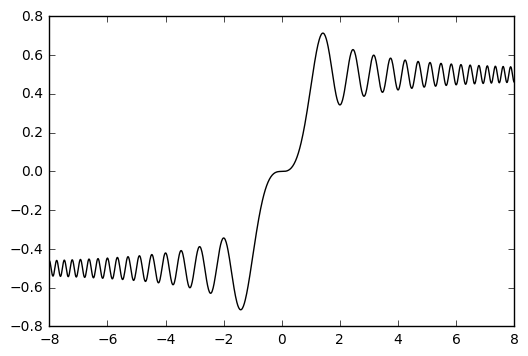

In [42]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dom = np.linspace(-8.0, 8.0, 1000)
plt.plot(dom, [F(x) for x in dom], color="black")
plt.show()

Keep in mind, sometimes Sympy will not know how to compute a closed form for an anti-derivative. 

In [44]:
sp.pprint( sp.exp(sp.exp(-x**2)))
sp.pprint( sp.integrate(sp.exp(sp.exp(-x**2)),x) )

 ⎛   2⎞
 ⎜ -x ⎟
 ⎝ℯ   ⎠
ℯ      
⌠           
⎮  ⎛   2⎞   
⎮  ⎜ -x ⎟   
⎮  ⎝ℯ   ⎠   
⎮ ℯ       dx
⌡           


There are two reasons for this:

1) Anti-derivatives of "classical" functions do not always have expressions as "classical" functions, or combinations of them.   This is knowledge created in the mathematical subject called **differential algebra** pioneered by <a href="https://en.wikipedia.org/wiki/Liouville%27s_theorem_(differential_algebra)">Liouville</a>.  Roughly speaking it gives a framework to decide whether or not a function's anti-derivative can be expressed as a combination of *elementary* functions.   Liouville's original theorem has a fairly restricted context and is not properly speaking an algorithm.  Sympy has implemented an extension of the <a href="https://en.wikipedia.org/wiki/Risch_algorithm">Risch algorithm</a> which can be thought of as a more complete and useful version of Liouville's theorem.  This is essentially how all computer algebra packages look for anti-derivatives, in closed form. 

The **Risch algorithm** tells us that functions like $\sin(x^2)$ does **not** have an anti-derivative expressible in closed form. Sympy uses various conventions from mathematics to assign classical names to "well-known" anti-derivatives, such as $\int \sin(x^2) dx$ and the *Fresnel function*, $\int e^{-x^2} dx$ and the *Error function*, etc. 

2) The Risch algorithm can be fairly computationally intensive and often the memory requirements and run-times are beyond their computational platform's abilities, or the user's patience.


In [45]:
## Recall

f = sp.sin(x**2)
F = sp.integrate(f,x)
sp.pprint(f)
sp.pprint(F)

   ⎛ 2⎞
sin⎝x ⎠
                ⎛√2⋅x⎞       
3⋅√2⋅√π⋅fresnels⎜────⎟⋅Γ(3/4)
                ⎝ √π ⎠       
─────────────────────────────
           8⋅Γ(7/4)          


In [46]:
print(F)

3*sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*x/sqrt(pi))*gamma(3/4)/(8*gamma(7/4))


## Asking sympy to solve equations

Sympy has some fairly sophisticated algorithms to solve polynomial equations. It uses these algorithms to build tools to solve (symbolically) a wide array of equations, even ones that are not polynomial. 

Sympy can:

 * Factor polynomials.
 * Find roots of polynomials, symbolically as well as numerically. 
 * Solve (symbolically as well as numerically) simultaneous polynomial equations.
 * Solve simultaneous equations that are not polynomial
    

In [49]:
p = x*x - 2
sp.pprint(sp.solve(p,x))

p = x*x + 2
sp.pprint(sp.solve(p,x))

[-√2, √2]
[-√2⋅ⅈ, √2⋅ⅈ]


In general the *sp.solve(f,x)* command solves the expression $f=0$ for the variable $x$.

In [54]:
a,b,c = sp.symbols('a b c')
p = a*x**2 + b*x + c
print("Let's solve for the roots of \n \n")
sp.pprint(p)
print("\n \n")
sp.pprint(sp.solve(p,x))

Let's solve for the roots of 
 

   2          
a⋅x  + b⋅x + c

 

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦


Let's similarly find the roots of degree 3, 4 and 5 polynomials. 

Alternatively, we could leave the symbolic world and find roots numerically.

In [56]:
p = x**3 + x**2 -x - 1
sp.pprint(p)
P=sp.Poly(p,x).coeffs()
print("Extracted coefficients: ", str(P))

 3    2        
x  + x  - x - 1
Extracted coefficients:  [1, 1, -1, -1]


In [57]:
print(str(np.roots(P))+"\n")

[ 1.         -1.00000001 -0.99999999]



In [61]:
import mpmath as mp

mp.mp.pretty=True
print(str(mp.polyroots(P))+"\n")


[1.0, (-1.0 - 1.25049450131375e-10j), (-1.0 + 1.2799322008877e-10j)]



Let's try solving some systems of equations.


In [62]:
y = sp.Symbol("y")
sol = sp.solve([x**2 + y**2 - 4, x*y-1 ])
print(type(sol))
print(len(sol))

<class 'list'>
4


In [63]:
for i in range(len(sol)): 
    print("Solution " + str(i))
    sp.pprint(sol[i])
    print("\n")
## sol[i] is a dict object
print("Solutions are dictionary type: "+str(type(sol[0])))

Solution 0
⎧   ⎛       _________⎞   _________ ⎛    _________    ⎞        _________⎫
⎨x: ⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠, y: -╲╱ -√3 + 2 ⎬
⎩                                                                      ⎭


Solution 1
⎧    ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫
⎨x: -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬
⎩                                                                    ⎭


Solution 2
⎧   ⎛       ________⎞   ________ ⎛    ________    ⎞        ________⎫
⎨x: ⎝-2 - ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝- ╲╱ √3 + 2  + 2⎠, y: -╲╱ √3 + 2 ⎬
⎩                                                                  ⎭


Solution 3
⎧    ⎛       ________⎞   ________ ⎛  ________    ⎞       ________⎫
⎨x: -⎝-2 + ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝╲╱ √3 + 2  + 2⎠, y: ╲╱ √3 + 2 ⎬
⎩                                                                ⎭


Solutions are dictionary type: <class 'dict'>


In [64]:
## This is how we can access them. 
print("x-coord of solution 0: "+str(sol[0][x].evalf(10)))
print("y-coord of solution 0: "+str(sol[0][y].evalf(10)))

x-coord of solution 0: -1.931851653
y-coord of solution 0: -0.5176380902


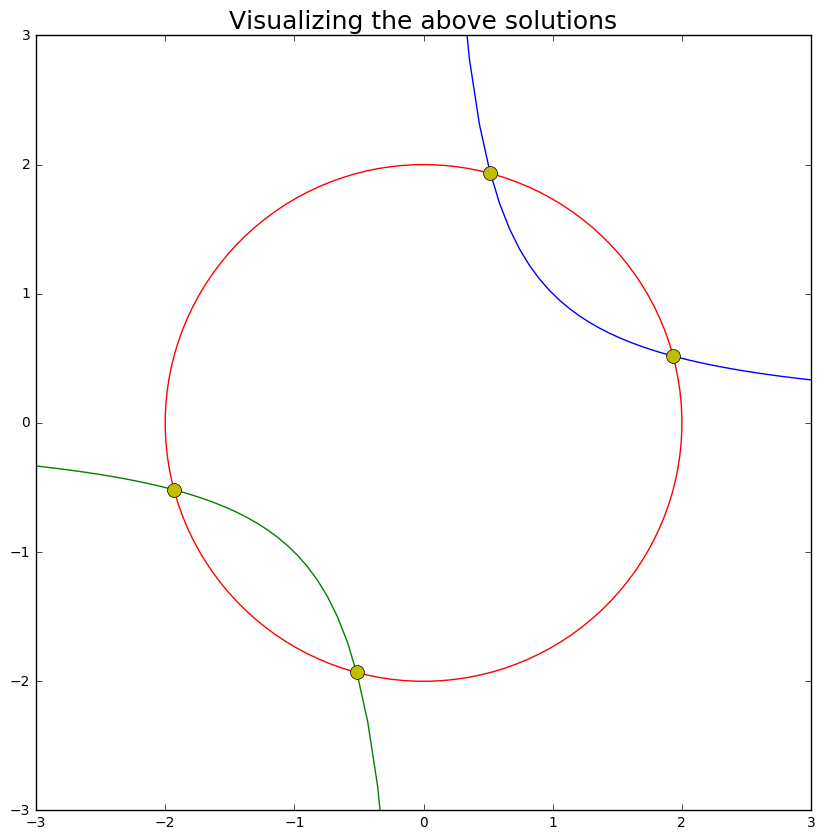

In [66]:
## And we can visualize the solutions with matplotlib
fig, ax = plt.subplots(figsize=(10,10))
circle = plt.Circle( (0,0), 2, color='r', fill=False)

x1 = np.linspace(0.2, 4)
y1 = x1**(-1)
ax.plot(x1, y1,'-')

x2 = np.linspace(-4,-0.2)
y2 = x2**(-1)
ax.plot(x2, y2,'-')

ax.set_title('Visualizing the above solutions', fontsize=18)

## the roots we found with sympy, yellow dots.
ax.plot([sol[i][x].evalf(10) for i in range(len(sol))], [sol[i][y].evalf(10) for i in range(len(sol))],\
        'yo', markersize=10)

fig.gca().add_artist(circle)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.show()